In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
import numpy as np

def FCM(X, c_clusters=3, m=2, eps=10):
    membership_mat = np.random.random((len(X), c_clusters))
    membership_mat = np.divide(membership_mat, np.sum(membership_mat, axis=1)[:, np.newaxis])

    while True:
        working_membership_mat = membership_mat ** m
        Centroids = np.divide(np.dot(working_membership_mat.T, X), np.sum(working_membership_mat.T, axis=1)[:, np.newaxis])
        
        n_c_distance_mat = np.zeros((len(X), c_clusters))
        for i, x in enumerate(X):
            for j, c in enumerate(Centroids):
                n_c_distance_mat[i][j] = np.linalg.norm(x-c, 2)
        
        new_membership_mat = np.zeros((len(X), c_clusters))
        
        for i, x in enumerate(X):
            for j, c in enumerate(Centroids):
                new_membership_mat[i][j] = 1. / np.sum((n_c_distance_mat[i][j] / n_c_distance_mat[i]) ** (2 / (m - 1)))
        if np.sum(abs(new_membership_mat - membership_mat)) < eps:
            break
        membership_mat =  new_membership_mat
    return np.argmax(new_membership_mat, axis=1)

In [4]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [5]:
test_y = FCM(iris.data)

In [6]:
evaluate_it(iris.target, test_y)

(0.7487508922198429, 0.856326530612245, 0.8935099337748345)

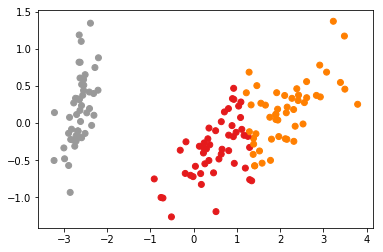

In [7]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_y, cmap=plt.cm.Set1)

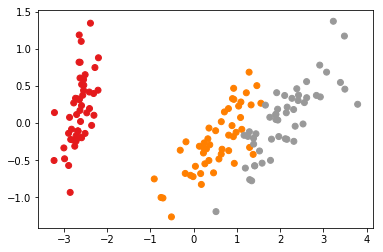

In [8]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target, cmap=plt.cm.Set1)